In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv('economic_data.csv')

In [15]:
df.sample(5)

,year,month,interest_rate,unemployment_rate,index_price
433,1957,5,3.72,6.54,458.875814
542,1966,6,3.53,5.11,552.597520
538,1962,6,4.01,6.43,560.559852
109,1933,2,2.93,5.71,302.508559
979,2003,10,3.76,5.01,634.536148


In [16]:
df.shape

(1200, 5)

In [17]:
df.columns


Index(['year', 'month', 'interest_rate', 'unemployment_rate', 'index_price'], dtype='object')

In [18]:
df.isnull().sum()

year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [19]:
df.drop(columns=['year','month'], inplace=True)

In [20]:
df.describe()

,interest_rate,unemployment_rate,index_price
count,1200.000000,1200.000000,1200.000000
mean,3.040050,5.049392,407.213139
std,0.983762,1.445544,339.826463
min,0.500000,2.000000,-580.090673
25%,2.377500,4.037500,176.135386
50%,3.050000,5.020000,408.201032
75%,3.672500,6.010000,633.871918
max,6.850000,9.790000,1634.035645


<Axes: >

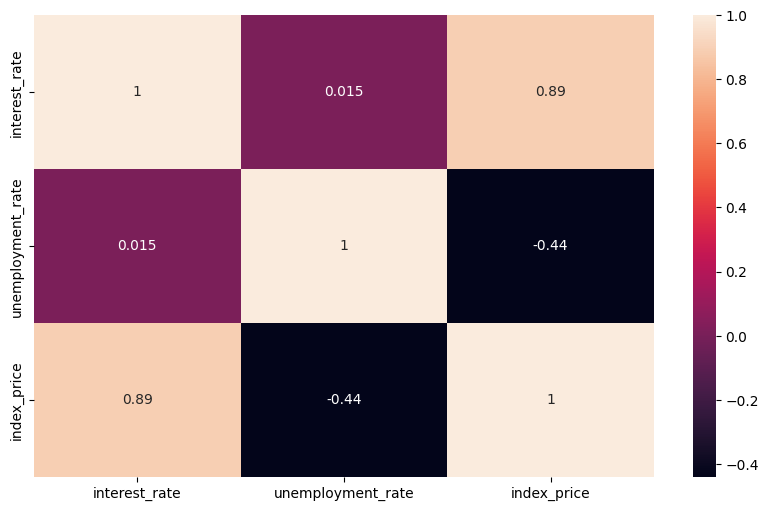

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

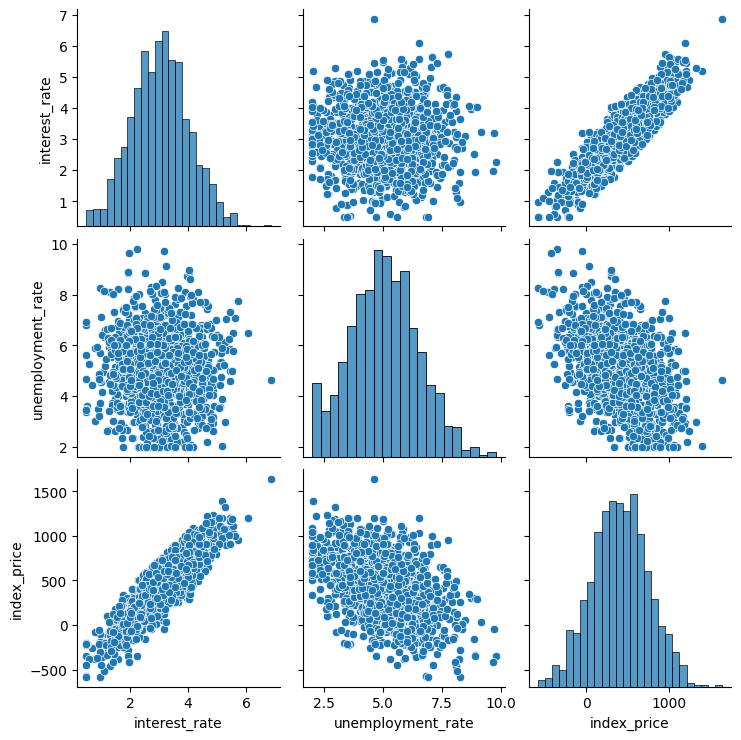

In [26]:
sns.pairplot(df)

In [31]:
# remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [32]:
lower_bound, upper_bound

(interest_rate          0.435000
 unemployment_rate      1.078750
 index_price         -510.469412
 dtype: float64,
 interest_rate           5.615000
 unemployment_rate       8.968750
 index_price          1320.476716
 dtype: float64)

In [33]:
mask = ((df >= lower_bound) & (df <= upper_bound))

In [39]:
df_no_outliers = df[mask.all(axis=1)]
df_no_outliers.shape

(1185, 3)

In [40]:
df.shape

(1200, 3)

In [41]:
df = df_no_outliers

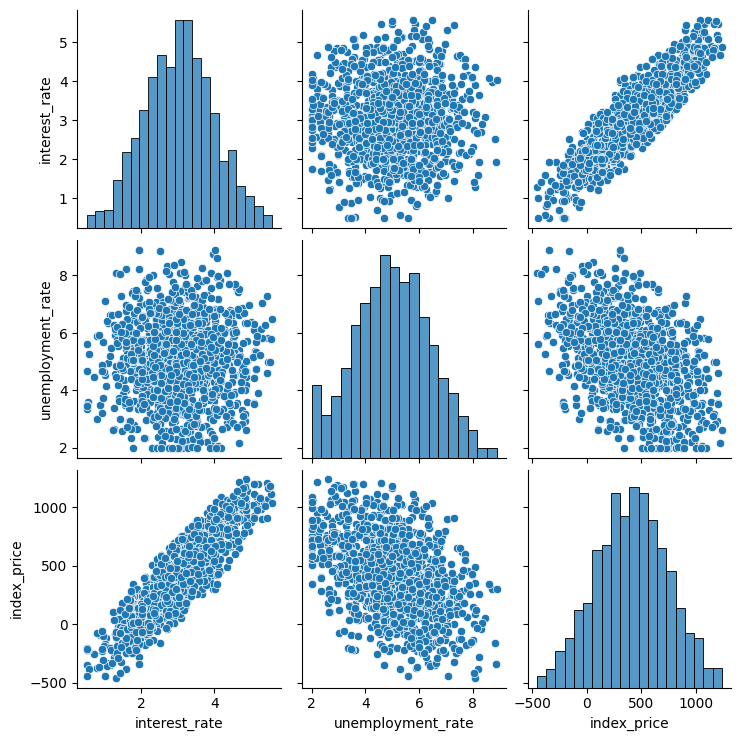

In [46]:
sns.pairplot(df)

In [47]:
df.describe()

,interest_rate,unemployment_rate,index_price
count,1185.000000,1185.000000,1185.000000
mean,3.034245,5.021907,408.348519
std,0.959141,1.409927,329.443356
min,0.500000,2.000000,-456.659074
25%,2.380000,4.030000,181.222215
50%,3.050000,5.000000,409.791044
75%,3.660000,5.980000,632.399970
max,5.570000,8.900000,1236.609318


In [48]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.028615,0.889541
unemployment_rate,0.028615,1.000000,-0.431208
index_price,0.889541,-0.431208,1.000000


In [49]:
## visualize the relationship between the features and the response using scatterplots

Text(0, 0.5, 'index_price')

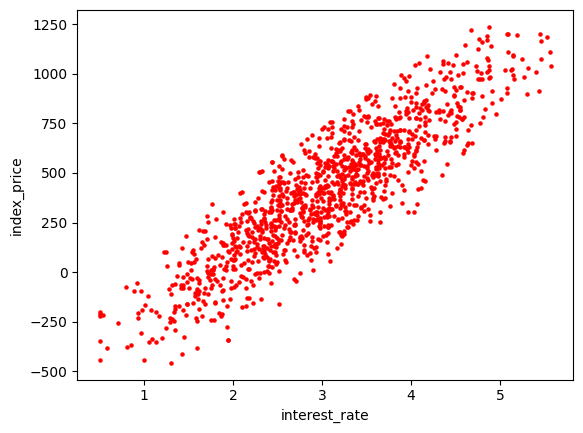

In [51]:
plt.scatter(df['interest_rate'], df['index_price'],color='r',s=5)
plt.xlabel('interest_rate')
plt.ylabel('index_price')

Text(0, 0.5, 'index_price')

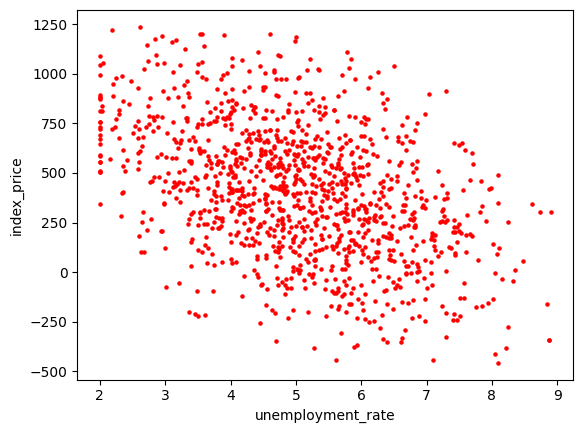

In [52]:
plt.scatter(df['unemployment_rate'], df['index_price'],color='r',s=5)
plt.xlabel('unemployment_rate')
plt.ylabel('index_price')

In [53]:
## get my dependent and independent variables
X = df[['interest_rate', 'unemployment_rate']]
y = df['index_price']

In [55]:
X,y

(      interest_rate  unemployment_rate
 0              3.50               5.19
 1              2.86               4.36
 2              3.65               5.18
 3              4.52               5.81
 4              2.77               5.07
 ...             ...                ...
 1195           3.44               2.83
 1196           2.98               3.62
 1197           3.55               3.49
 1198           3.22               5.31
 1199           4.36               5.10
 
 [1185 rows x 2 columns],
 0       534.714897
 1       424.911412
 2       582.253910
 3       784.797318
 4       321.169866
            ...    
 1195    767.901200
 1196    541.022220
 1197    731.564473
 1198    435.166468
 1199    810.947961
 Name: index_price, Length: 1185, dtype: float64)

In [56]:
## train test split

from sklearn.model_selection import train_test_split

In [57]:
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.25,random_state=42)

In [62]:
X_test.shape,X_train.shape,y_test.shape,y_train.shape

((888, 2), (297, 2), (888,), (297,))

<Axes: xlabel='interest_rate', ylabel='index_price'>

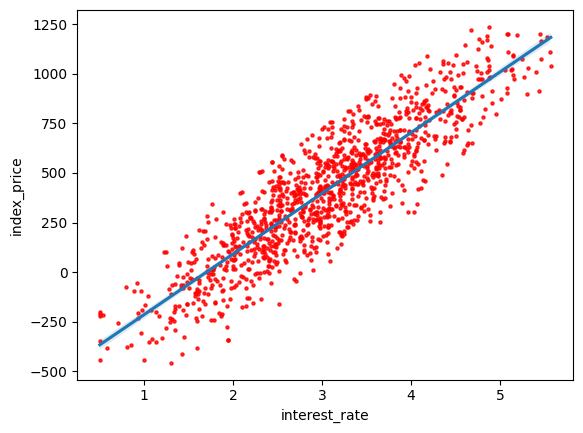

In [64]:
sns.regplot(x='interest_rate',y='index_price',data=df,scatter_kws={'color':'r','s':5})

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

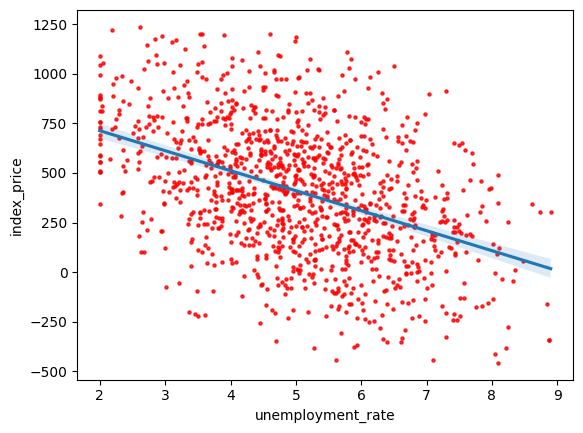

In [65]:
sns.regplot(x='unemployment_rate',y='index_price',data=df,scatter_kws={'color':'r','s':5})

In [69]:
## standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
## apply linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [72]:
model.fit(X_train,y_train)

LinearRegression()

    ex dataset = 1000
       /   \
      /     \
    train   test
    (900)   (100)
    /  \           
   /    \
train   validation              if cv = 5  then test = 900/5 = 180

In [78]:
from sklearn.model_selection import cross_val_score 
print(np.mean(cross_val_score(model, X_train, y_train, cv=3)))

0.9999984510364187


In [80]:
## predications
y_pred = model.predict(X_test)

In [92]:
## performance metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f} R2: {r2:.2f}')
print(1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f'Intercept: {model.intercept_}, Coefficients: {model.coef_}')
print(f'Accuracy: {model.score(X_test, y_test)*100 :.2f}%')

MSE: 0.73, RMSE: 0.86, MAE: 0.19 R2: 1.00
0.9999933100509961
Intercept: 406.6266895505506, Coefficients: [ 281.96099728 -149.28431251]
Accuracy: 100.00%


In [88]:
X_train.shape,y_train.shape

((297, 2), (297,))

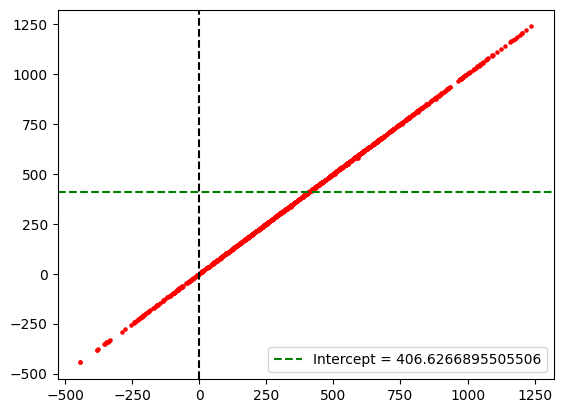

In [90]:
plt.scatter(y_test, y_pred, color='r',s=5)
plt.axhline(y=model.intercept_, color='green', linestyle='--', label=f'Intercept = {model.intercept_}')
plt.axvline(x=0, color='black', linestyle='--')  # X=0 line
plt.legend()
plt.show()


In [93]:
## Assumptions of Linear Regression

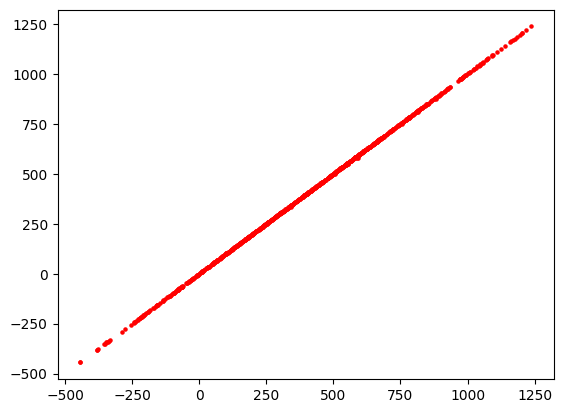

In [94]:
plt.scatter(y_test, y_pred, color='r',s=5)

Mean of the errors: 0.040937446595798906


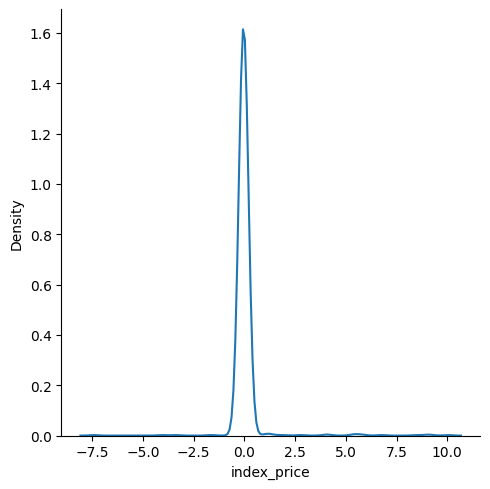

In [97]:
error = y_test - y_pred
print(f'Mean of the errors: {np.mean(error)}')
sns.displot(error, kind='kde')

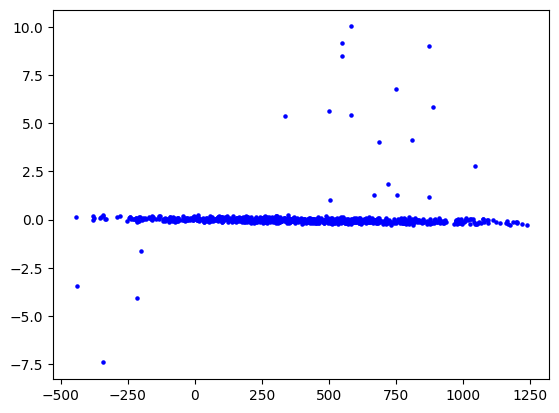

In [99]:
plt.scatter(y_pred, error, color='b',s=5)

In [100]:
import statsmodels.api as sm
ml = sm.OLS(y_train, X_train).fit()
print(ml.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.387
Model:                            OLS   Adj. R-squared (uncentered):              0.382
Method:                 Least Squares   F-statistic:                              92.96
Date:                Tue, 21 Jan 2025   Prob (F-statistic):                    4.93e-32
Time:                        13:36:12   Log-Likelihood:                         -2205.8
No. Observations:                 297   AIC:                                      4416.
Df Residuals:                     295   BIC:                                      4423.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [112]:
model.predict(scaler.transform([[4.50, 6.1]]))

array([764.816871])

In [108]:
df.sample(5)

,interest_rate,unemployment_rate,index_price
385,3.15,6.04,335.572882
364,3.69,6.11,495.533001
1078,4.50,6.00,758.344473
675,2.22,7.09,-64.735005
10,2.54,3.13,456.804455
